In [1]:
from gensim import models
mod_path  = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
mod       = models.KeyedVectors.load_word2vec_format(mod_path, binary=True)
voc       = mod.vocab.keys()

keywords = ['Burger', 'Caesar Salad', 'Cup Cake', 'Deviled Eggs', 'Eggs Russian',
         'Caprese Salad', 'Carrot Cake', 'Greek Salad', 'Chocolate Cake', 'Paneer Curry', 'Chicken Curry', 'Vegetable Curry', 'Donut']
keywords.sort()
keywords

# print('Number of keywords  : ' + str(len(keywords)))
vec = list()
a = []
b = []
c = 0
j = 0
l = ['Burger', 'Caesar Salad', 'Caprese Salad', 'Carrot Cake', 'Butter Chicken', 'Chocolate Cake', 
     'Cup Cake', 'Deviled Eggs', 'Donut', 'Eggs Benedict', 'Greek Salad', 'Paneer Butter Masala', 'Mixed Vegetable Curry']
for i, w in enumerate(keywords):
    # print(str(i+1) + "\t" + str(word))

    if ' ' in w:
        w1, w2 = w.split(' ')

        if w1 in voc:
            vec1 = mod[w1]
        else:
            print("Word {} not in voc".format(w))
            vec.append([0])
            continue

        if w2 in voc:
            vec2 = mod[w2]
        else:
            print("Word {} not in voc".format(w))
            vec.append([0])
            continue

        vec3 = (vec1 + vec2)/2.
        # vec.append(w1)
        vec.append(vec3)
        continue

    if w in voc:
        # vec.append(w1)
        vec.append(mod[w])

    else:
        print("Word {} not in voc".format(w))
        c = 1
        vec.append([0])
    j+=1

for i in range(len(vec)):
  a.append(l[i])
  a.append(vec[i])
  b.append(a)
  a = []
print(b)


import numpy as np
np.save('with_donut', b)

[['Burger', array([-7.22656250e-02,  2.59765625e-01, -1.68945312e-01,  3.06640625e-01,
       -1.33789062e-01,  2.83203125e-01,  2.08007812e-01, -5.17578125e-02,
        1.31835938e-01, -1.23046875e-01, -1.45263672e-02,  1.31835938e-01,
        2.35351562e-01, -6.03027344e-02, -1.73828125e-01,  8.25195312e-02,
       -1.19628906e-01, -3.58886719e-02, -1.04003906e-01,  3.06640625e-01,
        2.19726562e-01, -1.12304688e-01,  2.42187500e-01, -1.87500000e-01,
        5.05371094e-02,  1.07421875e-01, -2.15820312e-01, -1.66015625e-01,
        2.38281250e-01,  1.67968750e-01,  1.17675781e-01, -1.10839844e-01,
       -4.61425781e-02,  5.73730469e-02, -1.70898438e-02,  4.10156250e-02,
        4.17968750e-01,  1.92382812e-01,  1.96289062e-01, -5.02929688e-02,
        1.58203125e-01, -1.40625000e-01,  4.19921875e-02,  2.25585938e-01,
       -1.16699219e-01,  5.05371094e-02, -1.84326172e-02, -1.17675781e-01,
        6.49414062e-02,  2.85156250e-01, -1.60156250e-01,  1.46484375e-01,
       -3.295

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [2]:
print('Length of the Word2Vec Embedding Vectors:', len(vec))

Length of the Word2Vec Embedding Vectors: 13


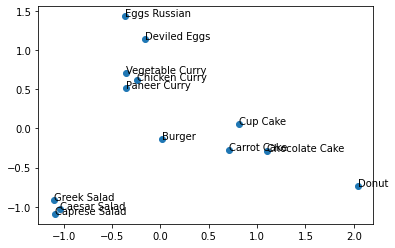

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
X = vec
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
plt.rcParams.update({'font.size': 10})
for i, w in enumerate(keywords):
	plt.annotate(w, xy=(result[i, 0], result[i, 1]))
plt.show()

In [4]:
import pandas as pd
data = {'First': l,
        'Second': result[:,0],
        'Third': result[:,1]}
df = pd.DataFrame (data, columns = ['First', 'Second', 'Third'])
df

,First,Second,Third
0,Burger,0.018078,-0.133570
1,Caesar Salad,-1.032866,-1.029769
2,Caprese Salad,-1.087153,-1.092033
3,Carrot Cake,0.711386,-0.275840
4,Butter Chicken,-0.243513,0.618568
5,Chocolate Cake,1.105984,-0.293028
6,Cup Cake,0.810642,0.053961
7,Deviled Eggs,-0.153501,1.139763
8,Donut,2.044452,-0.732808
9,Eggs Benedict,-0.367119,1.433458


In [5]:
df.to_csv('Test word2vec.csv', index=False)